### Natural Language Processing with Disaster Tweets


In [1]:
import pandas as pd
import re
from string import punctuation
import nltk
from nltk.corpus import stopwords
import string
string.punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv(r"train.csv")
test = pd.read_csv(r"test.csv")

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
train.shape

(7613, 5)

In [6]:
test.shape

(3263, 4)

In [7]:
train.describe

<bound method NDFrame.describe of          id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w.

In [8]:
test.describe

<bound method NDFrame.describe of          id keyword location  \
0         0     NaN      NaN   
1         2     NaN      NaN   
2         3     NaN      NaN   
3         9     NaN      NaN   
4        11     NaN      NaN   
...     ...     ...      ...   
3258  10861     NaN      NaN   
3259  10865     NaN      NaN   
3260  10868     NaN      NaN   
3261  10874     NaN      NaN   
3262  10875     NaN      NaN   

                                                   text  
0                    Just happened a terrible car crash  
1     Heard about #earthquake is different cities, s...  
2     there is a forest fire at spot pond, geese are...  
3              Apocalypse lighting. #Spokane #wildfires  
4         Typhoon Soudelor kills 28 in China and Taiwan  
...                                                 ...  
3258  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...  
3259  Storm in RI worse than last hurricane. My city...  
3260  Green Line derailment in Chicago http://t.co/U...  
3

In [9]:
train.value_counts()

id     keyword   location                        text                                                                                                                                 target
48     ablaze    Birmingham                      @bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C                                                                              1         1
7166   mudslide  Chiswick, London                2 great new recipes; mudslide cake and so sorry stew! #GBBO                                                                          0         1
7178   mudslide  Edinburgh                       @hazelannmac ooh now I feel guilty about wishing hatman out. I bet the mudslide was delicious!                                       0         1
7176   mudslide  London                          First impressions: glad hat man is leaving in lieu of more interesting ladies. Hope mudslide lady triumphs next week.                0         1
7174   mudslide  The Pumpkin Carria

In [10]:
test.value_counts()

id     keyword             location                  text                                                                                                                                            
46     ablaze              London                    Birmingham Wholesale Market is ablaze BBC News - Fire breaks out at Birmingham's Wholesale Market http://t.co/irWqCEZWEU                            1
7182   mudslide            St Albans                 @curryspcworld looks like a mudslide. Unreal scenes.                                                                                                1
7257   nuclear%20disaster  Canada                    Digital archive of public documents on the 2011 nuclear catastrophe at Fukushima launched. http://t.co/faJnMjNcxp                                   1
7249   nuclear%20disaster  Almost there              No authorities of Japan take responsibility about Nuclear disaster.\nNobody have confidence in safety of Nuclear Plants in Japan.\n#Anonymou

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [13]:
train.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [14]:
test.columns

Index(['id', 'keyword', 'location', 'text'], dtype='object')

# Pre-processing & EDA

In [15]:
import pandas as pd

In [16]:
train.isnull()

,id,keyword,location,text,target
0,False,True,True,False,False
1,False,True,True,False,False
2,False,True,True,False,False
3,False,True,True,False,False
4,False,True,True,False,False
...,...,...,...,...,...
7608,False,True,True,False,False
7609,False,True,True,False,False
7610,False,True,True,False,False
7611,False,True,True,False,False


In [17]:
test.isnull()

,id,keyword,location,text
0,False,True,True,False
1,False,True,True,False
2,False,True,True,False
3,False,True,True,False
4,False,True,True,False
...,...,...,...,...
3258,False,True,True,False
3259,False,True,True,False
3260,False,True,True,False
3261,False,True,True,False


In [18]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [19]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

# Visulaization

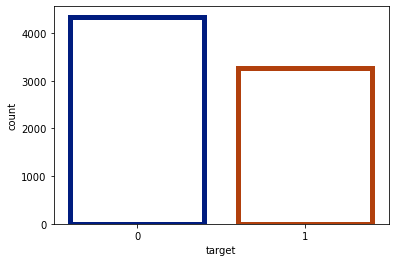

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
a = sns.countplot(x="target", data= train,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))

# Checking null values

In [21]:
# drop the null values columns
train.drop(['keyword','location','id'], axis = 1, inplace = True)
# drop the null values columns
test.drop(['keyword','location','id'], axis = 1, inplace = True)

In [22]:
train.isnull().sum()

text      0
target    0
dtype: int64

In [23]:
test.isnull().sum()

text    0
dtype: int64

# Cleaning data

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
def clean_text(text):
    nopunc = ''.join([char for char in text if char not in string.punctuation])
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
train['clean_text'] = train['text'].apply(lambda x : clean_text(x))
test['clean_text'] = test['text'].apply(lambda x : clean_text(x))
train.head()

,text,target,clean_text
0,Our Deeds are the Reason of this #earthquake M...,1,"[Deeds, Reason, earthquake, May, ALLAH, Forgiv..."
1,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,All residents asked to 'shelter in place' are ...,1,"[residents, asked, shelter, place, notified, o..."
3,"13,000 people receive #wildfires evacuation or...",1,"[13000, people, receive, wildfires, evacuation..."
4,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, Ruby, Alaska, smoke, wildfi..."


In [148]:
def remove_URL(text):
    return re.sub(r"https://t.co", "", text)
def remove_another(text):
    return re.sub('[^\x00-\x7f]','', text)
def alpha_only(text):
    data = []
    for i in text:    
        if i.isalpha():
            data.append(i)
    return data
stop = stopwords.words('english')
        

In [149]:
train["text_clean"] = train["text"].apply(lambda x: x.lower())
train["text_clean"] = train["text_clean"].apply(lambda x: remove_another(x))
train["text_clean"] = train["text_clean"].apply(lambda x: remove_URL(x))
train["text_clean"] = train["text_clean"].apply(lambda x: x.split())
train["text_clean"] = train["text_clean"].apply(lambda x: alpha_only(x))
train["text_clean"] = train["text_clean"].apply(lambda x: np.array([word for word in x if word not in stop]))
train["text_clean_2"] = train["text_clean"].apply(lambda x: " ".join(x))

test["text_clean"] = test["text"].apply(lambda x: x.lower())
test["text_clean"] = test["text_clean"].apply(lambda x: remove_another(x))
test["text_clean"] = test["text_clean"].apply(lambda x: remove_URL(x))
test["text_clean"] = test["text_clean"].apply(lambda x: x.split())
test["text_clean"] = test["text_clean"].apply(lambda x: alpha_only(x))
test["text_clean"] = test["text_clean"].apply(lambda x: np.array([word for word in x if word not in stop]))
test["text_clean_2"] = train["text_clean"].apply(lambda x: " ".join(x))

display(train.head())
display(test.head())


,text,target,clean_text,stemmed,lemma,text_clean,text_clean_2
0,Our Deeds are the Reason of this #earthquake M...,1,"[Deeds, Reason, earthquake, May, ALLAH, Forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]","[Deeds, Reason, earthquake, May, ALLAH, Forgiv...","[deeds, reason, may, allah, forgive, us]",deeds reason may allah forgive us
1,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, rong, sask, canada]","[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, ronge, canada]",forest fire near la ronge canada
2,All residents asked to 'shelter in place' are ...,1,"[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...","[resident, asked, shelter, place, notified, of...","[residents, asked, notified, evacuation, shelt...",residents asked notified evacuation shelter pl...
3,"13,000 people receive #wildfires evacuation or...",1,"[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, people, receive, wildfire, evacuation,...","[people, receive, evacuation, orders, california]",people receive evacuation orders california
4,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, Ruby, Alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, Ruby, Alaska, smoke, wildfi...","[got, sent, photo, ruby, smoke, pours, school]",got sent photo ruby smoke pours school


,text,clean_text,stemmed,lemma,text_clean,text_clean_2
0,Just happened a terrible car crash,"[happened, terrible, car, crash]","[happen, terribl, car, crash]","[happened, terrible, car, crash]","[happened, terrible, car, crash]",deeds reason may allah forgive us
1,"Heard about #earthquake is different cities, s...","[Heard, earthquake, different, cities, stay, s...","[heard, earthquak, differ, citi, stay, safe, e...","[Heard, earthquake, different, city, stay, saf...","[heard, different, stay, safe]",forest fire near la ronge canada
2,"there is a forest fire at spot pond, geese are...","[forest, fire, spot, pond, geese, fleeing, acr...","[forest, fire, spot, pond, gees, flee, across,...","[forest, fire, spot, pond, goose, fleeing, acr...","[forest, fire, spot, geese, fleeing, across, c...",residents asked notified evacuation shelter pl...
3,Apocalypse lighting. #Spokane #wildfires,"[Apocalypse, lighting, Spokane, wildfires]","[apocalyps, light, spokan, wildfir]","[Apocalypse, lighting, Spokane, wildfire]",[apocalypse],people receive evacuation orders california
4,Typhoon Soudelor kills 28 in China and Taiwan,"[Typhoon, Soudelor, kills, 28, China, Taiwan]","[typhoon, soudelor, kill, 28, china, taiwan]","[Typhoon, Soudelor, kill, 28, China, Taiwan]","[typhoon, soudelor, kills, china, taiwan]",got sent photo ruby smoke pours school


# Stemming

In [29]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
train['stemmed'] = train['clean_text'].apply(lambda x: [porter_stemmer.stem(y) for y in x])
test['stemmed'] = test['clean_text'].apply(lambda x: [porter_stemmer.stem(y) for y in x])

In [30]:
train.head()

,text,target,clean_text,stemmed
0,Our Deeds are the Reason of this #earthquake M...,1,"[Deeds, Reason, earthquake, May, ALLAH, Forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]"
1,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, rong, sask, canada]"
2,All residents asked to 'shelter in place' are ...,1,"[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev..."
3,"13,000 people receive #wildfires evacuation or...",1,"[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ..."
4,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, Ruby, Alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi..."


# Lemmetization

In [31]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
train['lemma'] = train['clean_text'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x])
test['lemma'] = test['clean_text'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x])

In [33]:
train.head()

,text,target,clean_text,stemmed,lemma
0,Our Deeds are the Reason of this #earthquake M...,1,"[Deeds, Reason, earthquake, May, ALLAH, Forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]","[Deeds, Reason, earthquake, May, ALLAH, Forgiv..."
1,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, rong, sask, canada]","[Forest, fire, near, La, Ronge, Sask, Canada]"
2,All residents asked to 'shelter in place' are ...,1,"[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...","[resident, asked, shelter, place, notified, of..."
3,"13,000 people receive #wildfires evacuation or...",1,"[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, people, receive, wildfire, evacuation,..."
4,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, Ruby, Alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, Ruby, Alaska, smoke, wildfi..."


### Splitting

In [34]:
# Extracting X matrix and y vector
X = train["text"].to_numpy()
y = train["target"].to_numpy()

# splitting the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(6090, 1523, 6090, 1523)

### Text Normalization Using TfidfVectorizer

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True, analyzer=clean_text, ngram_range=(1,3), min_df=1, stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


### Count all words

In [108]:
all_text = " ".join(train["text_clean_2"].values)
all_words = all_text.split()
all_words = set(all_words)
numwords = len(all_words)

### Visualize the count of all words

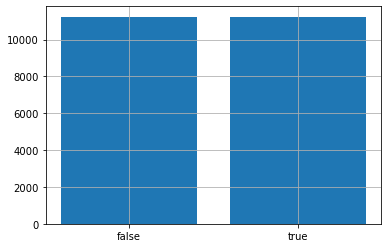

In [109]:
import matplotlib.pyplot as plt
plt.bar(["false","true"],numwords)
plt.grid()
plt.show()

In [130]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [131]:
count_vectorizer = feature_extraction.text.CountVectorizer()

## let's get counts for the first 5 tweets in the data
example_train_vectors = count_vectorizer.fit_transform(train["text"][0:5])

In [132]:
print(example_train_vectors[0].todense().shape)
print(example_train_vectors[0].todense())

(1, 54)
[[0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0]]


### Building Vectors

In [133]:
train_vectors = count_vectorizer.fit_transform(train["text"])

## note that we're NOT using .fit_transform() here. Using just .transform() makes sure
# that the tokens in the train vectors are the only ones mapped to the test vectors - 
# i.e. that the train and test vectors use the same set of tokens.
test_vectors = count_vectorizer.transform(test["text"])

### Model Building

Support Vector Machine(SVM) Model

In [144]:
from sklearn.svm import SVC
class_svc = SVC()
class_svc.fit(X_train, y_train)

SVC()

Classifier using Ridge regression.
##This classifier first converts the target values into {-1, 1} and then treats the problem as a regression task (multi-output regression in the multiclass case)##

In [145]:
clf = linear_model.RidgeClassifier()

In [146]:
scores = model_selection.cross_val_score(clf, train_vectors, train["target"], cv=3, scoring="f1")
scores

array([0.59421842, 0.56455572, 0.64051005])

In [136]:
clf.fit(train_vectors, train["target"])

RidgeClassifier()

### Sample submission

In [138]:
sample_submission = pd.read_csv("sample_submission.csv")

In [139]:
sample_submission["target"] = clf.predict(test_vectors)

In [140]:
sample_submission.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1


In [147]:
sample_submission.to_csv("submission.csv", index=False)